In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
LAST_TRAINING_DAY = pd.Timestamp('20180101')

In [3]:
apple = pd.read_csv('data/apple-5y.csv')

In [4]:
apple.head()

,date,close,volume,open,high,low
0,16:00,216.16,"18,476,356",216.41,216.90,215.110
1,2018/08/24,216.16,18457720.0000,216.60,216.90,215.110
2,2018/08/23,215.49,18505780.0000,214.65,217.05,214.600
3,2018/08/22,215.05,18965930.0000,214.10,216.36,213.840
4,2018/08/21,215.04,25682700.0000,216.80,217.19,214.025


In [5]:
apple = apple.iloc[1:]

In [6]:
apple['date'] = pd.to_datetime(apple['date'])

In [7]:
apple_prophet = apple[apple['date'] < LAST_TRAINING_DAY]

In [8]:
apple_prophet = apple_prophet.drop(columns=['volume', 'open', 'high', 'low'])

In [9]:
apple_prophet = apple_prophet.rename({'date': 'ds', 'close': 'y'}, axis='columns')

In [10]:
m = Prophet()
m.fit(apple_prophet)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [11]:
apple_prophet.head()

,ds,y
165,2017-12-29,169.23
166,2017-12-28,171.08
167,2017-12-27,170.60
168,2017-12-26,170.57
169,2017-12-22,175.01


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1456,2018-12-25
1457,2018-12-26
1458,2018-12-27
1459,2018-12-28
1460,2018-12-29


In [13]:
forecast = m.predict(future)

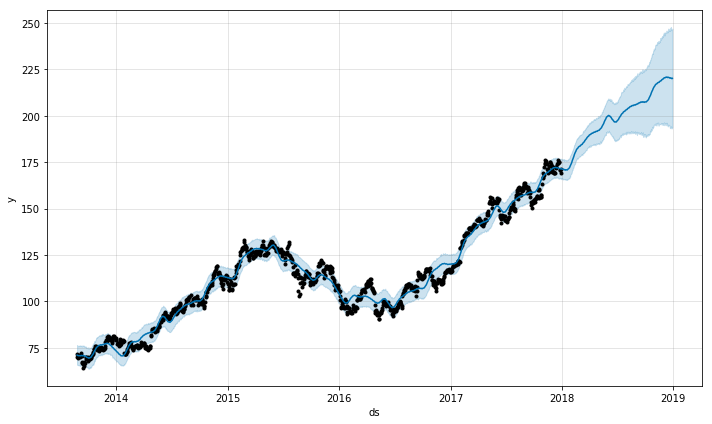

In [14]:
fig1 = m.plot(forecast)

In [15]:
forecast.tail().head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1456,2018-12-25,222.253450,195.868881,248.081233,194.342564,246.900437,-1.978962,-1.978962,-1.978962,0.0,0.0,0.0,0.003676,0.003676,0.003676,-1.982638,-1.982638,-1.982638,220.274488
1457,2018-12-26,222.386568,195.884280,248.292692,193.197750,246.139365,-2.153931,-2.153931,-2.153931,0.0,0.0,0.0,0.003978,0.003978,0.003978,-2.157910,-2.157910,-2.157910,220.232637
1458,2018-12-27,222.519686,195.899680,248.542047,193.185038,246.586230,-2.437129,-2.437129,-2.437129,0.0,0.0,0.0,-0.105358,-0.105358,-0.105358,-2.331771,-2.331771,-2.331771,220.082558
1459,2018-12-28,222.652804,195.915079,248.841668,193.650664,246.319044,-2.635078,-2.635078,-2.635078,0.0,0.0,0.0,-0.130565,-0.130565,-0.130565,-2.504513,-2.504513,-2.504513,220.017727
1460,2018-12-29,222.785922,195.930479,249.141288,193.727336,247.019920,-2.600191,-2.600191,-2.600191,0.0,0.0,0.0,0.076335,0.076335,0.076335,-2.676527,-2.676527,-2.676527,220.185731


In [16]:
df_result = pd.DataFrame(columns=['date', 'value', 'prediction', 'error'])

In [17]:
for index, row in apple[apple['date'] > LAST_TRAINING_DAY].iterrows():
    prediction_row = forecast[forecast['ds'] == row['date']]
    if len(prediction_row > 0):
        date = row['date']
        value = row['close']
        prediction = forecast[forecast['ds'] == date]['yhat'].values[0]
        error = value - prediction
        df_result = df_result.append({'date': date, 'value': value, 'prediction': prediction, 'error': error}, ignore_index=True)

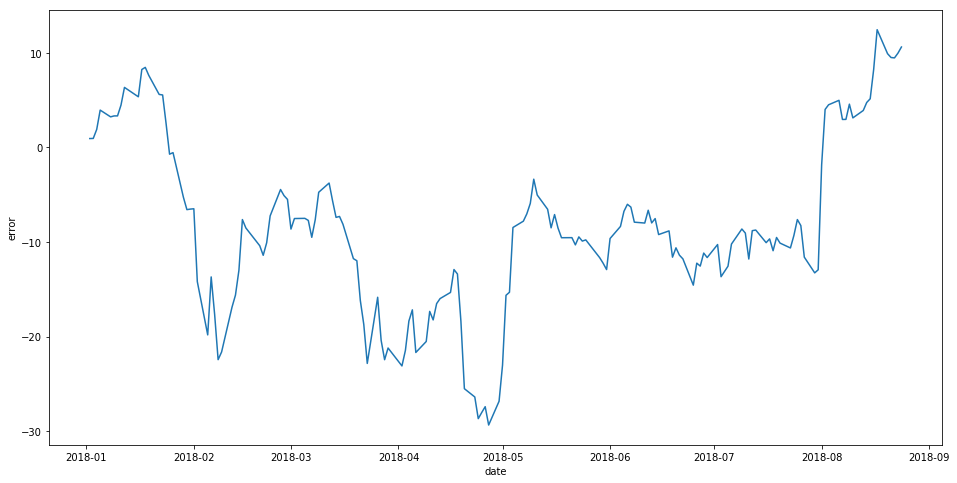

In [18]:
plt.subplots(figsize=(16, 8))
sns.lineplot(x="date", y="error", data=df_result)

In [19]:
mean_squared_error(df_result['value'], df_result['prediction'])

153.83905047014758